In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.DataFrame(dict(x=[1, 2, np.nan], y=[2, np.nan, np.nan]))

In [8]:
df['x'].fillna(df['x'].mean(), inplace=True)

In [9]:
df

x    y
0  1.0  2.0
1  2.0  NaN
2  1.5  NaN

In [10]:
df = pd.DataFrame(dict(x=[1, np.nan, 3, 4, np.nan, 5],
                       y=['a', 'b', 'a', 'b', 'a', 'b']))

In [15]:
df['x'].fillna(df.join(df.groupby('y').mean(), on='y', rsuffix="_mean")['x_mean'])

0    1.0
1    4.5
2    3.0
3    4.0
4    2.0
5    5.0
Name: x, dtype: float64

In [19]:
df['x'].fillna(df.groupby('y').mean()['x'])

0    1.0
1    NaN
2    3.0
3    4.0
4    NaN
5    5.0
Name: x, dtype: float64

In [21]:
df.groupby('y').mean()['x']

y
a    2.0
b    4.5
Name: x, dtype: float64

In [23]:
df = pd.DataFrame(np.empty((10000, 3)), columns=['x', 'y', 'z'])

In [25]:
df.shape

(10000, 3)

In [27]:
%%timeit
for i in range(10000):
    df.iloc[i] = [1, 2, 3]

1.47 s ± 18.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [61]:
df = pd.DataFrame([], columns=['x', 'y', 'z'])

In [63]:
pd.concat([df, pd.DataFrame([[1, 2, 3]], columns=['x', 'y', 'z'])], axis=0)

x  y  z
0  1  2  3

In [31]:
for i in range(10000):
    df.loc[i] = [1, 2, 3]

In [70]:
grades_long = pd.DataFrame([['Alice', 'Algebra', 4],
                 ['Bob', 'Algebra', 5],
                 ['Alice', 'Geometry', 5],
                 ['Bob', 'Geometry', 3]], columns=['student', 'course', 'grade'])

In [71]:
grades_long

student    course  grade
0   Alice   Algebra      4
1     Bob   Algebra      5
2   Alice  Geometry      5
3     Bob  Geometry      3

In [76]:
(grades_long
 .pivot(index='student', columns='course', values='grade')
 .assign(mean=lambda x: x.Algebra * 0.4 + x.Geometry * 0.6))

course   Algebra  Geometry  mean
student                         
Alice          4         5   4.6
Bob            5         3   3.8

In [77]:
grades_long = pd.DataFrame([['Alice', 'Algebra', 4],
                 ['Bob', 'Algebra', 5],
                 ['Alice', 'Geometry', 5],
                 ['Bob', 'Geometry', 3],
                 ['Bob', 'Geometry', 5]], columns=['student', 'course', 'grade'])

In [80]:
grades_long

student    course  grade
0   Alice   Algebra      4
1     Bob   Algebra      5
2   Alice  Geometry      5
3     Bob  Geometry      3
4     Bob  Geometry      5

In [79]:
grades_long.pivot(index='student', columns='course', values='grade')

ValueError: Index contains duplicate entries, cannot reshape

In [82]:
grades_long

student    course  grade
0   Alice   Algebra      4
1     Bob   Algebra      5
2   Alice  Geometry      5
3     Bob  Geometry      3
4     Bob  Geometry      5

In [85]:
grades_long.pivot_table(index='student', 
                        columns='course', 
                        values='grade',
                        aggfunc='max')

course   Algebra  Geometry
student                   
Alice          4         5
Bob            5         5

In [90]:
grades_wide = grades_long.pivot_table(index='student', 
                        columns='course', 
                        values='grade',
                        aggfunc=lambda x: (max(x) + min(x)) / 2)

In [93]:
grades_wide.shape

(2, 2)

In [97]:
grades_wide.loc['Alice']

course
Algebra     4
Geometry    5
Name: Alice, dtype: int64

In [ ]:
grades_wide.rename

In [105]:
grades_wide = grades_wide.reset_index()

In [108]:
grades_wide.columns.name = None

In [111]:
grades_wide.columns = ['Student', 'Algebra', 'Geometry']

In [112]:
grades_wide

Student  Algebra  Geometry
0   Alice        4         5
1     Bob        5         4

In [116]:
(grades_wide
 .melt(id_vars='Student', value_name='grade', var_name='course')
 .rename(columns={'Student': 'student'}))

student    course  grade
0   Alice   Algebra      4
1     Bob   Algebra      5
2   Alice  Geometry      5
3     Bob  Geometry      4

In [117]:
students = pd.DataFrame([['Alice', 123],
                         ['Bob', 231],
                         ['Claudia', 513]], columns=['name', 'id'])

In [118]:
students

name   id
0    Alice  123
1      Bob  231
2  Claudia  513

In [119]:
grades = pd.DataFrame([[123, 5, 4],
                       [513, 4, 3],
                       [987, 5, 3]],
                      columns=['student_id', 'algebra', 'geometry'])

In [123]:
students.merge(grades, left_on='id', right_on='student_id')

name   id  student_id  algebra  geometry
0    Alice  123         123        5         4
1  Claudia  513         513        4         3

In [124]:
students.merge(grades, left_on='id', right_on='student_id', how='left')

name   id  student_id  algebra  geometry
0    Alice  123       123.0      5.0       4.0
1      Bob  231         NaN      NaN       NaN
2  Claudia  513       513.0      4.0       3.0

In [125]:
students.merge(grades, left_on='id', right_on='student_id', how='right')

name     id  student_id  algebra  geometry
0    Alice  123.0         123        5         4
1  Claudia  513.0         513        4         3
2      NaN    NaN         987        5         3

In [126]:
students.merge(grades, left_on='id', right_on='student_id', how='outer')

name     id  student_id  algebra  geometry
0    Alice  123.0       123.0      5.0       4.0
1      Bob  231.0         NaN      NaN       NaN
2  Claudia  513.0       513.0      4.0       3.0
3      NaN    NaN       987.0      5.0       3.0

In [127]:
students = pd.DataFrame([['Alice', 123],
                         ['Bob', 123],
                         ['Claudia', 513]], columns=['name', 'id'])
grades = pd.DataFrame([[123, 5, 4],
                       [123, 4, 3],
                       [987, 5, 3]],
                      columns=['student_id', 'algebra', 'geometry'])
students.merge(grades, left_on='id', right_on='student_id')

name   id  student_id  algebra  geometry
0  Alice  123         123        5         4
1  Alice  123         123        4         3
2    Bob  123         123        5         4
3    Bob  123         123        4         3

In [130]:
students1 = pd.DataFrame([['Alice', 'Smith', 4],
                         ['Alice', 'Doe', 3],
                         ['Bob', 'Smith', 5]], columns=['first_name', 'last_name', 'grade'])
students2 = pd.DataFrame([['Alice', 'Smith', 5],
                         ['Alice', 'Doe', 3],
                         ['Bob', 'Smith', 2]], columns=['first_name', 'last_name', 'grade'])

In [132]:
students1.merge(students2, on=['first_name', 'last_name'], suffixes=('_first', '_second'))

first_name last_name  grade_first  grade_second
0      Alice     Smith            4             5
1      Alice       Doe            3             3
2        Bob     Smith            5             2

In [133]:
grades

student_id  algebra  geometry
0         123        5         4
1         123        4         3
2         987        5         3

In [134]:
students

name   id
0    Alice  123
1      Bob  123
2  Claudia  513

In [136]:
grades.join(students.set_index('id'), on='student_id')

student_id  algebra  geometry   name
0         123        5         4  Alice
0         123        5         4    Bob
1         123        4         3  Alice
1         123        4         3    Bob
2         987        5         3    NaN

In [137]:
df = pd.read_csv("https://bit.ly/2PpXC6d")

In [139]:
%matplotlib inline

In [140]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [150]:
import matplotlib.pyplot as plt

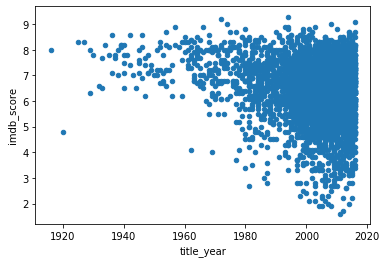

In [158]:
df.plot.scatter(x='title_year', y='imdb_score')

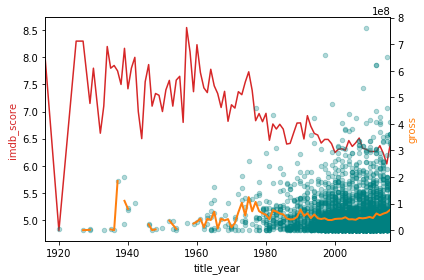

In [186]:
fig, ax1 = plt.subplots()

color = 'tab:red'
# ax1.set_xlabel('year')
ax1.set_ylabel('imdb_score', color=color)
# ax1.plot(t, data1, color=color)
# ax1.tick_params(axis='y', labelcolor=color)
df.groupby('title_year')['imdb_score'].mean().plot(ax=ax1, color=color)
# df.plot.scatter(x='title_year', y='imdb_score', ax=ax1, alpha=0.3, color='teal')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('budget', color=color)  # we already handled the x-label with ax1
# ax2.plot(t, data2, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

df.groupby('title_year')['gross'].mean().plot(ax=ax2, lw=2, color=color)
df.plot.scatter(x='title_year', y='gross', ax=ax2, alpha=0.3, color='teal')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

In [185]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [178]:
df[(df['budget'] > 1E9) & (df['duration'] > 100)]

color    director_name  num_critic_for_reviews  duration  \
2323  Color   Hayao Miyazaki                   174.0     134.0   
2334  Color  Katsuhiro Ôtomo                   105.0     103.0   
2988  Color     Joon-ho Bong                   363.0     110.0   
3005  Color     Lajos Koltai                    73.0     134.0   
3423  Color  Katsuhiro Ôtomo                   150.0     124.0   
3859  Color   Chan-wook Park                   202.0     112.0   

      director_facebook_likes  actor_3_facebook_likes        actor_2_name  \
2323                   6000.0                   745.0  Jada Pinkett Smith   
2334                     78.0                   101.0  Robin Atkin Downes   
2988                    584.0                    74.0        Kang-ho Song   
3005                     45.0                     0.0     Péter Fancsikai   
3423                     78.0                     4.0       Takeshi Kusao   
3859                      0.0                    38.0        Yeong-ae Lee   

      actor_1_facebook_likes      gross  \
2323                   893.0  2298191.0   
2334                   488.0   410388.0   
2988                   629.0  2201412.0   
3005                     9.0   195888.0   
3423                     6.0   439162.0   
3859                   717.0   211667.0   

                                                 genres  ...  \
2323                        Adventure|Animation|Fantasy  ...   
2334  Action|Adventure|Animation|Family|Sci-Fi|Thriller  ...   
2988                         Comedy|Drama|Horror|Sci-Fi  ...   
3005                                  Drama|Romance|War  ...   
3423                            Action|Animation|Sci-Fi  ...   
3859                                        Crime|Drama  ...   

     num_user_for_reviews   language      country  content_rating  \
2323                570.0   Japanese        Japan           PG-13   
2334                 79.0   Japanese        Japan           PG-13   
2988                279.0     Korean  South Korea               R   
3005                 45.0  Hungarian      Hungary               R   
3423                430.0   Japanese        Japan               R   
3859                131.0     Korean  South Korea               R   

            budget  title_year actor_2_facebook_likes imdb_score  \
2323  2.400000e+09      1997.0                  851.0        8.4   
2334  2.127520e+09      2004.0                  336.0        6.9   
2988  1.221550e+10      2006.0                  398.0        7.0   
3005  2.500000e+09      2005.0                    2.0        7.1   
3423  1.100000e+09      1988.0                    5.0        8.1   
3859  4.200000e+09      2005.0                  126.0        7.7   

      aspect_ratio movie_facebook_likes  
2323          1.85                11000  
2334          1.85                  973  
2988          1.85                 7000  
3005          2.35                  607  
3423          1.85                    0  
3859          2.35                 4000  

[6 rows x 28 columns]

In [182]:
df.query('budget > 8E9')['country']

2988    South Korea
Name: country, dtype: object

In [184]:
df.query('country == "South Korea"')['budget']

1072    4.800000e+07
1325    3.920000e+07
1564    3.500000e+07
2612             NaN
2833    1.340000e+07
2892    1.262000e+07
2914    1.280000e+07
2988    1.221550e+10
3248    1.000000e+07
3255    1.000000e+07
3309             NaN
3342    8.000000e+06
3859    4.200000e+09
4105    3.000000e+06
Name: budget, dtype: float64

In [188]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [192]:
likes_columns = df.columns[df.columns.str.contains('likes')]

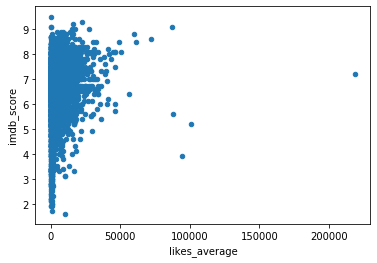

In [198]:
(df
 .assign(likes_average = df[likes_columns].mean(axis=1))
 .plot.scatter(x='likes_average', y='imdb_score'))

In [207]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [212]:
(df.assign(likes_average = df[likes_columns].mean(axis=1))
 .sort_values('likes_average', ascending=False))[['actor_1_name', 'actor_1_facebook_likes']]

actor_1_name  actor_1_facebook_likes
1902  Darcy Donavan                640000.0
1223   Krista Allen                164000.0
4704   Matthew Ziff                260000.0
4592   Matthew Ziff                260000.0
4409   Matthew Ziff                260000.0
...             ...                     ...
3834          Bhama                     5.0
4958   Stephen Carr                     2.0
4763  Daston Kalili                     2.0
4416     Ami Ayalon                     0.0
4965  Jonathan Blow                     0.0

[5043 rows x 2 columns]